In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sn
import matplotlib.pyplot as pyt
%matplotlib inline

In [3]:
df= pd.read_csv('Classified Data',index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
df_feat=pd.DataFrame(scaled_feature,columns=df.columns[:-1])

 df_feat.head()

In [10]:
from sklearn.cross_validation import train_test_split

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X=df_feat
y=df['TARGET CLASS']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
pred=knn.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report


In [18]:
classification_report(y_test,pred)

'             precision    recall  f1-score   support\n\n          0       0.93      0.94      0.94       155\n          1       0.95      0.94      0.94       175\n\navg / total       0.94      0.94      0.94       330\n'

In [19]:
error_rate=[] 

In [20]:
for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5,1,'K vs error')

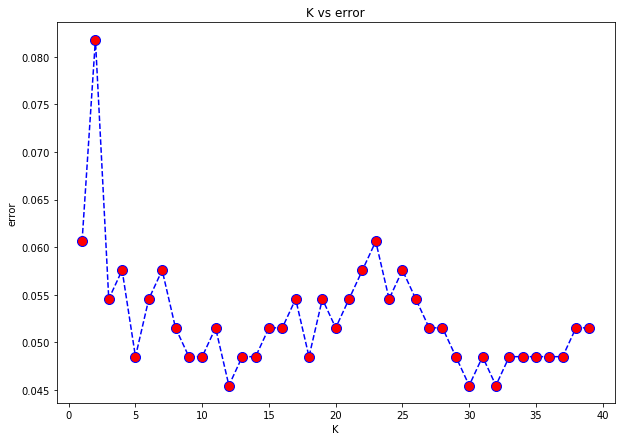

In [21]:
pyt.figure(figsize=(10,7))
pyt.plot(range(1,40),error_rate,linestyle='dashed',color='blue',marker='o',markersize=10,markerfacecolor='red')
pyt.xlabel('K')
pyt.ylabel('error')
pyt.title('K vs error')

In [22]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
classification_report(pred,y_test)

'             precision    recall  f1-score   support\n\n          0       0.95      0.94      0.95       157\n          1       0.95      0.96      0.95       173\n\navg / total       0.95      0.95      0.95       330\n'